In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터/data_submission')

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [ ]:
dft = pd.read_csv("y_sum_hg_all.csv")
asos = pd.read_csv("ASOS_final.csv")

In [ ]:
dft['location'] = dft['sgg'].str[0:2]
dft

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location
0,0,개진면,고령군,고령군 개진면,0.0,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1,고령
1,1,성산면,고령군,고령군 성산면,0.0,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1,고령
2,2,우곡면,고령군,고령군 우곡면,1.0,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13,고령
3,3,각북면,청도군,청도군 각북면,0.0,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1,청도
4,4,이서면,청도군,청도군 이서면,0.0,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1,청도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,신안동,진주시,진주시 신안동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주
633,633,충무공동,진주시,진주시 충무공동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주
634,634,욕지면,통영시,통영시 욕지면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영
635,635,사량면,통영시,통영시 사량면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영


In [ ]:
all_area = set()

for i in range(len(dft)):
  all_area.add(dft['sgg'][i] +"_"+ dft['umd'][i])

all_area

{'거제시_거제면',
 '거제시_고현동',
 '거제시_남부면',
 '거제시_능포동',
 '거제시_동부면',
 '거제시_둔덕면',
 '거제시_사등면',
 '거제시_상문동',
 '거제시_수양동',
 '거제시_아주동',
 '거제시_연초면',
 '거제시_옥포1동',
 '거제시_옥포2동',
 '거제시_일운면',
 '거제시_장목면',
 '거제시_장승포동',
 '거제시_장평동',
 '거제시_하청면',
 '거창군_가북면',
 '거창군_가조면',
 '거창군_거창읍',
 '거창군_고제면',
 '거창군_남상면',
 '거창군_남하면',
 '거창군_마리면',
 '거창군_북상면',
 '거창군_신원면',
 '거창군_웅양면',
 '거창군_위천면',
 '거창군_주상면',
 '경산시_남부동',
 '경산시_남산면',
 '경산시_남천면',
 '경산시_동부동',
 '경산시_북부동',
 '경산시_서부1동',
 '경산시_서부2동',
 '경산시_압량읍',
 '경산시_와촌면',
 '경산시_용성면',
 '경산시_자인면',
 '경산시_중방동',
 '경산시_중앙동',
 '경산시_진량읍',
 '경산시_하양읍',
 '경주시_감포읍',
 '경주시_강동면',
 '경주시_건천읍',
 '경주시_내남면',
 '경주시_동천동',
 '경주시_보덕동',
 '경주시_불국동',
 '경주시_산내면',
 '경주시_서면',
 '경주시_선도동',
 '경주시_성건동',
 '경주시_안강읍',
 '경주시_양남면',
 '경주시_양북면',
 '경주시_외동읍',
 '경주시_용강동',
 '경주시_월성동',
 '경주시_중부동',
 '경주시_천북면',
 '경주시_현곡면',
 '경주시_황남동',
 '경주시_황성동',
 '경주시_황오동',
 '고령군_개진면',
 '고령군_다산면',
 '고령군_대가야읍',
 '고령군_덕곡면',
 '고령군_성산면',
 '고령군_쌍림면',
 '고령군_우곡면',
 '고령군_운수면',
 '고성군_개천면',
 '고성군_거류면',
 '고성군_고성읍',
 '고성군_구만면',
 '고성군_대가면',
 '고성군_동해면',
 '고성군_마암면',

In [ ]:
for i in range(len(dft['location'])):
  if dft['location'][i] == '울릉':
    dft['location'][i] = '울릉도'
  elif dft['location'][i] == '김해':
    dft['location'][i] = '김해시'
  elif dft['location'][i] == '양산':
    dft['location'][i] = '양산시' 
  elif dft['location'][i] == '의령':
    dft['location'][i] = '의령군'
  elif dft['location'][i] == '함양':
    dft['location'][i] = '함양군'
  elif dft['location'][i] == '청송':
    dft['location'][i] = '청송군'
  elif dft['location'][i] == '경주':
    dft['location'][i] = '경주시'
  # 창원의 경우 북창원과 창원 구분이 필요함
  elif dft['location'][i] == '창원시 마산합포구':
    dft['location'][i] = '창원'
  elif dft['location'][i] == '창원시 마산회원구':
    dft['location'][i] = '북창원'
  elif dft['location'][i] == '창원시 성산구':
    dft['location'][i] = '북창원'
  elif dft['location'][i] == '창원시 진해구':
    dft['location'][i] = '창원'
  elif dft['location'][i] == '창원시 의창구':
    dft['location'][i] = '북창원'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_pa

In [ ]:
asos_area = set()

for i in range(len(asos)):
  asos_area.add(asos['stnNm'][i])

asos_area

{'거제',
 '거창',
 '경주시',
 '구미',
 '김해시',
 '남해',
 '대구',
 '문경',
 '밀양',
 '봉화',
 '부산',
 '북창원',
 '산청',
 '상주',
 '안동',
 '양산시',
 '영덕',
 '영주',
 '영천',
 '울릉도',
 '울산',
 '울진',
 '의령군',
 '의성',
 '진주',
 '창원',
 '청송군',
 '통영',
 '포항',
 '함양군',
 '합천'}

In [ ]:
# ASOS 날씨 데이터 기준 sites
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

dic = {key:value for key, value in zip(sites_index, sites)}

dft['stnId'] = 0
missing_area = []

for i in range(len(dft['location'])):
  if dft['location'][i] in sites_index:
    dft['stnId'][i] = dic[dft['location'][i]]
  else:
    missing_area.append(dft['location'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
s = list(set(missing_area))

In [ ]:
match = []

for i in range(len(dft['location'])):
  if dft['location'][i] in s:
    match.append(dft['sgg'][i] + " " + dft['umd'][i])

In [ ]:
m = set(match)
m

{'경산시 남부동',
 '경산시 남산면',
 '경산시 남천면',
 '경산시 동부동',
 '경산시 북부동',
 '경산시 서부1동',
 '경산시 서부2동',
 '경산시 압량읍',
 '경산시 와촌면',
 '경산시 용성면',
 '경산시 자인면',
 '경산시 중방동',
 '경산시 중앙동',
 '경산시 진량읍',
 '경산시 하양읍',
 '고령군 개진면',
 '고령군 다산면',
 '고령군 대가야읍',
 '고령군 덕곡면',
 '고령군 성산면',
 '고령군 쌍림면',
 '고령군 우곡면',
 '고령군 운수면',
 '고성군 개천면',
 '고성군 거류면',
 '고성군 고성읍',
 '고성군 구만면',
 '고성군 대가면',
 '고성군 동해면',
 '고성군 마암면',
 '고성군 삼산면',
 '고성군 상리면',
 '고성군 영오면',
 '고성군 영현면',
 '고성군 하이면',
 '고성군 하일면',
 '고성군 회화면',
 '군위군 고로면',
 '군위군 군위읍',
 '군위군 부계면',
 '군위군 산성면',
 '군위군 소보면',
 '군위군 우보면',
 '군위군 의흥면',
 '군위군 효령면',
 '김천시 감문면',
 '김천시 감천면',
 '김천시 개령면',
 '김천시 구성면',
 '김천시 남면',
 '김천시 농소면',
 '김천시 대곡동',
 '김천시 대덕면',
 '김천시 대신동',
 '김천시 대항면',
 '김천시 봉산면',
 '김천시 부항면',
 '김천시 아포읍',
 '김천시 양금동',
 '김천시 어모면',
 '김천시 율곡동',
 '김천시 자산동',
 '김천시 조마면',
 '김천시 증산면',
 '김천시 지례면',
 '김천시 지좌동',
 '김천시 평화남산동',
 '사천시 곤명면',
 '사천시 곤양면',
 '사천시 남양동',
 '사천시 동서금동',
 '사천시 동서동',
 '사천시 벌용동',
 '사천시 사남면',
 '사천시 사천읍',
 '사천시 서포면',
 '사천시 선구동',
 '사천시 용현면',
 '사천시 정동면',
 '사천시 축동면',
 '사천시 향촌동',
 '성주군 가천면',
 '성주군 금수면',

In [ ]:
df_ld = dft

경산    15
칠곡     8
군위     8
영양     2

'영양군_석보면',
 '영양군_수비면',
 '영양군_영양읍',
 '영양군_일월면',
 '영양군_입암면',
 '영양군_청기면'

In [ ]:
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

dic_asos = {key:value for key, value in zip(sites_index, sites)}

# 가장 가까운 기상대
closest_area = {'김천': '구미', '예천': '문경', '사천': '진주', '청도': '밀양', '성주': '구미', 
                '고성': '구미', '고령': '합천', '함안': '창원', '하동': '진주', '창녕': '밀양',
                '경산': '영천', '칠곡': '구미', '군위': '의성'}

for i in range(len(df_ld['location'])):
  # 영양을 제외한 다른 구역은 가장 가까운 기상대 위치로 날씨 측정
  if df_ld['location'][i] in closest_area:
    # closest_area 딕셔너리에 value 값을 key 값 삼아서 그에 해당하는 dic_asos 딕셔너리 sites 코드 value 값 리턴
    curr = closest_area[df_ld['location'][i]]
    df_ld['stnId'][i] = dic_asos[curr]
    # df_ld['stnId'][i] = dic_asos[closest_area[df_ld['location'][i]]
  # 영양의 경우 읍면동 단위에 따라 서로 다른 기상대 위치로 날씨 측정
  if df_ld['location'][i] == '영양':
    if df_ld['umd'][i] == '석보면' or df_ld['umd'][i] == '영양읍' or df_ld['umd'][i] == '입암면':
      df_ld['stnId'][i] = dic_asos['청송군']
    elif df_ld['umd'][i] == '일월면' or df_ld['umd'][i] == '수비면':
      df_ld['stnId'][i] = dic_asos['울진']
    elif df_ld['umd'][i] == '청기면':
      df_ld['stnId'][i] = dic_asos['안동']
  if df_ld['location'][i] == '창원':
    if df_ld['sgg'][i] == '창원시 의창구' or df_ld['sgg'][i] == '창원시 마산회원구' or df_ld['sgg'][i] == '창원시 성산구':
      df_ld['stnId'][i] = dic_asos['북창원']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
# Validation: 확인 결과 모든 값이 제대로 stnId을 받음을 확인함
df_ld_filtered = df_ld[df_ld['stnId'] == 0]
df_ld_filtered

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId


In [ ]:
df_ld_filtered.value_counts("location")

Series([], dtype: int64)

In [ ]:
df_ld

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId
0,0,개진면,고령군,고령군 개진면,0.0,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1,고령,285
1,1,성산면,고령군,고령군 성산면,0.0,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1,고령,285
2,2,우곡면,고령군,고령군 우곡면,1.0,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13,고령,285
3,3,각북면,청도군,청도군 각북면,0.0,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1,청도,288
4,4,이서면,청도군,청도군 이서면,0.0,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1,청도,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,신안동,진주시,진주시 신안동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192
633,633,충무공동,진주시,진주시 충무공동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192
634,634,욕지면,통영시,통영시 욕지면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162
635,635,사량면,통영시,통영시 사량면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162


In [ ]:
df3 = pd.read_csv("landslide_asos_merged_final.csv")

In [ ]:
df3.head()

,stnId,stnNm,tm,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
0,115,울릉도,2011-01-01,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,130,울진,2011-01-01,-1.0,-7.0,2.3,0.0,0.0,15.25,8.5,20.2,12.3,6.0,40.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,136,안동,2011-01-01,-4.5,-11.0,2.9,0.0,0.0,0.00,0.0,7.4,4.4,2.1,41.0,58.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,137,상주,2011-01-01,-5.2,-9.9,0.5,0.0,0.0,0.00,0.0,9.8,5.3,3.3,36.0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,138,포항,2011-01-01,-0.6,-6.2,5.2,0.0,0.0,0.00,0.0,11.1,4.7,2.8,39.0,48.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df_sample3 = df3.drop(["sd", 'umd', "sgg", "location", "sum_cnt", "sum_hpa"], axis=1)

In [ ]:
df1 = df_ld
df2 = pd.read_csv('tree_sum_final.csv', encoding = 'cp949')

In [ ]:
df1

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId
0,0,개진면,고령군,고령군 개진면,0.0,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1,고령,285
1,1,성산면,고령군,고령군 성산면,0.0,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1,고령,285
2,2,우곡면,고령군,고령군 우곡면,1.0,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13,고령,285
3,3,각북면,청도군,청도군 각북면,0.0,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1,청도,288
4,4,이서면,청도군,청도군 이서면,0.0,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1,청도,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,신안동,진주시,진주시 신안동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192
633,633,충무공동,진주시,진주시 충무공동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192
634,634,욕지면,통영시,통영시 욕지면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162
635,635,사량면,통영시,통영시 사량면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162


In [ ]:
df2

,umd,sgg,umd2,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT
0,부계면,군위군,군위군 부계면,1,2,1,11,2,4,C,12
1,우보면,군위군,군위군 우보면,1,2,1,11,2,4,C,12
2,산성면,군위군,군위군 산성면,1,2,1,11,2,4,C,12
3,신녕면,영천시,영천시 신녕면,1,2,2,30,1,3,C,10
4,화산면,영천시,영천시 화산면,1,2,2,30,1,3,C,10
...,...,...,...,...,...,...,...,...,...,...,...
620,야로면,합천군,합천군 야로면,1,2,1,11,2,5,C,12
621,묘산면,합천군,합천군 묘산면,1,2,2,34,2,5,C,12
622,덕곡면,합천군,합천군 덕곡면,1,2,1,11,2,4,C,12
623,청덕면,합천군,합천군 청덕면,1,2,1,11,2,4,C,12


In [ ]:
df_sample1 = df1.drop(["Unnamed: 0", 'umd', "sgg", "sum_cnt", "landslide"], axis=1)

In [ ]:
df_sample2 = df2.drop(['umd', "sgg", "DNST_CD"], axis=1)

In [ ]:
merge_outer = pd.merge(df_sample1,df_sample2, how='outer',on='umd2')
merge_outer

,umd2,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
0,고령군 개진면,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0
1,고령군 성산면,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0
2,고령군 우곡면,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13,고령,285,1.0,2.0,1.0,11.0,2.0,4.0,14.0
3,청도군 각북면,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1,청도,288,1.0,2.0,1.0,11.0,2.0,4.0,14.0
4,청도군 이서면,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1,청도,288,1.0,2.0,2.0,30.0,2.0,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,진주시 신안동,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,진주시 충무공동,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,진주,192,1.0,2.0,2.0,30.0,1.0,3.0,10.0
634,통영시 욕지면,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162,1.0,2.0,2.0,30.0,2.0,4.0,10.0
635,통영시 사량면,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,통영,162,1.0,2.0,2.0,30.0,2.0,4.0,14.0


In [ ]:
# 날씨와 (토양도와 임상도) 합치기
merge_outer2 = pd.merge(merge_outer,df_sample3, how='outer',on='stnId')
merge_outer2

,umd2,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,stnNm,tm,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,landslide
0,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-01,-2.1,-8.4,4.4,0.0,0.0,0.0,0.0,9.3,6.0,1.8,25.0,48.9,0.0,0.0
1,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-02,-2.3,-8.8,7.0,0.0,0.0,0.0,0.0,6.4,4.9,1.0,31.0,67.0,0.0,0.0
2,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-03,-2.8,-10.1,3.5,0.0,0.0,0.0,0.4,5.7,3.7,0.8,36.0,77.8,0.0,0.0
3,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-04,-1.6,-6.3,5.8,0.0,0.0,0.0,0.5,5.8,2.8,1.0,35.0,73.9,0.0,0.0
4,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-05,-0.8,-6.9,5.2,0.0,0.0,0.0,0.0,8.3,4.5,1.4,33.0,60.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-27,3.6,0.4,9.0,0.0,0.0,0.0,0.0,14.5,7.4,3.2,19.0,35.4,0.0,0.0
2114295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-28,4.1,-0.3,9.4,0.0,0.0,0.0,0.0,9.2,5.3,2.1,23.0,34.1,0.0,0.0
2114296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-29,6.5,2.6,9.5,0.0,0.0,8.0,11.4,7.1,3.8,1.3,35.0,66.5,12.8,0.0
2114297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-30,9.6,7.1,14.0,0.0,0.0,1.5,1.4,12.3,6.5,2.2,59.0,81.5,0.0,0.0


In [ ]:
merge_outer2.isnull().sum()

umd2           9861
PRRCK_LARG     9861
PRRCK_MDDL     9861
LOCTN_ALTT     9861
LOCTN_GRDN     9861
EIGHT_AGL      9861
CLZN_CD        9861
TPGRP_TPCD     9861
PRDN_FOM_C     9861
SLANT_TYP      9861
SLDPT_TPCD     9861
SCSTX_CD       9861
SLTP_CD        9861
location       9861
stnId             0
STORUNST      49594
FROR_CD       49594
FRTP_CD       49594
KOFTR_GROU    49594
DMCLS_CD      49594
AGCLS_CD      49594
HEIGHT        49594
stnNm             0
tm                0
avgTa          1666
minTa           159
maxTa           215
mi10MaxRn         0
hr1MaxRn          0
sumRnDur          0
sumRn             0
maxInsWs        438
maxWs           544
avgWs           916
minRhm         1516
avgRhm         3627
n99Rn             0
landslide         0
dtype: int64

In [ ]:
merge_null = merge_outer2[merge_outer2["umd2"].isnull()]
merge_null

,umd2,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,stnNm,tm,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,landslide
2104438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,2011-01-01,-2.4,-7.2,2.7,0.0,0.0,0.00,0.0,10.0,5.0,3.1,32.0,44.4,0.0,0.0
2104439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,2011-01-02,-0.2,-5.9,6.4,0.0,0.0,0.00,0.0,5.8,3.6,1.9,29.0,49.8,0.0,0.0
2104440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,2011-01-03,-1.1,-6.3,1.5,0.0,0.0,7.17,0.9,5.5,3.4,2.2,45.0,63.0,0.0,0.0
2104441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,2011-01-04,0.0,-2.4,3.8,0.0,0.0,4.83,0.1,9.1,4.9,2.9,39.0,58.3,0.0,0.0
2104442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,2011-01-05,0.4,-2.7,5.9,0.0,0.0,0.00,0.0,10.6,5.7,2.9,29.0,51.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-27,3.6,0.4,9.0,0.0,0.0,0.00,0.0,14.5,7.4,3.2,19.0,35.4,0.0,0.0
2114295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-28,4.1,-0.3,9.4,0.0,0.0,0.00,0.0,9.2,5.3,2.1,23.0,34.1,0.0,0.0
2114296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-29,6.5,2.6,9.5,0.0,0.0,8.00,11.4,7.1,3.8,1.3,35.0,66.5,12.8,0.0
2114297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,부산,2019-12-30,9.6,7.1,14.0,0.0,0.0,1.50,1.4,12.3,6.5,2.2,59.0,81.5,0.0,0.0


In [ ]:
merge_null.value_counts("stnNm")

stnNm
울산    3287
부산    3287
대구    3287
dtype: int64

In [ ]:
mergr_del_null = merge_outer2.dropna(subset=['umd2'])
mergr_del_null

,umd2,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,location,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,stnNm,tm,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,landslide
0,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-01,-2.1,-8.4,4.4,0.0,0.0,0.00,0.0,9.3,6.0,1.8,25.0,48.9,0.0,0.0
1,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-02,-2.3,-8.8,7.0,0.0,0.0,0.00,0.0,6.4,4.9,1.0,31.0,67.0,0.0,0.0
2,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-03,-2.8,-10.1,3.5,0.0,0.0,0.00,0.4,5.7,3.7,0.8,36.0,77.8,0.0,0.0
3,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-04,-1.6,-6.3,5.8,0.0,0.0,0.00,0.5,5.8,2.8,1.0,35.0,73.9,0.0,0.0
4,고령군 개진면,2.0,24.0,306.1,18.7,158.6,3.0,12.0,1.0,1.0,20.0,2.0,1.0,고령,285,1.0,1.0,3.0,77.0,0.0,1.0,0.0,합천,2011-01-05,-0.8,-6.9,5.2,0.0,0.0,0.00,0.0,8.3,4.5,1.4,33.0,60.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104433,울릉군 북면,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,울릉도,115,1.0,2.0,2.0,30.0,1.0,5.0,16.0,울릉도,2019-12-27,1.8,0.4,4.5,0.0,0.0,20.17,5.9,23.9,16.4,6.5,58.0,75.6,3.9,0.0
2104434,울릉군 북면,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,울릉도,115,1.0,2.0,2.0,30.0,1.0,5.0,16.0,울릉도,2019-12-28,3.9,2.0,5.9,0.0,0.0,5.42,0.0,6.9,4.4,2.1,44.0,57.3,0.0,0.0
2104435,울릉군 북면,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,울릉도,115,1.0,2.0,2.0,30.0,1.0,5.0,16.0,울릉도,2019-12-29,6.5,3.3,8.8,0.0,0.0,2.17,0.0,7.2,3.4,1.7,43.0,56.1,0.7,0.0
2104436,울릉군 북면,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,울릉도,115,1.0,2.0,2.0,30.0,1.0,5.0,16.0,울릉도,2019-12-30,9.2,7.2,12.5,0.0,0.0,7.92,0.8,11.9,6.4,2.8,45.0,75.8,1.9,0.0


In [ ]:
mergr_del_null.to_csv("mergr_del_null.csv", index=False, encoding='utf-8-sig')

In [ ]:
df_sample = mergr_del_null.drop(['umd2', "location", "stnNm", "tm"], axis=1)

In [ ]:
df_sample = df_sample.dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060226 entries, 0 to 2104437
Data columns (total 34 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PRRCK_LARG  float64
 1   PRRCK_MDDL  float64
 2   LOCTN_ALTT  float64
 3   LOCTN_GRDN  float64
 4   EIGHT_AGL   float64
 5   CLZN_CD     float64
 6   TPGRP_TPCD  float64
 7   PRDN_FOM_C  float64
 8   SLANT_TYP   float64
 9   SLDPT_TPCD  float64
 10  SCSTX_CD    float64
 11  SLTP_CD     float64
 12  stnId       int64  
 13  STORUNST    float64
 14  FROR_CD     float64
 15  FRTP_CD     float64
 16  KOFTR_GROU  float64
 17  DMCLS_CD    float64
 18  AGCLS_CD    float64
 19  HEIGHT      float64
 20  avgTa       float64
 21  minTa       float64
 22  maxTa       float64
 23  mi10MaxRn   float64
 24  hr1MaxRn    float64
 25  sumRnDur    float64
 26  sumRn       float64
 27  maxInsWs    float64
 28  maxWs       float64
 29  avgWs       float64
 30  minRhm      float64
 31  avgRhm      float64
 32  n99Rn       float64
 33  landsli

In [ ]:
df_sample.columns

Index(['PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL',
       'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD',
       'SCSTX_CD', 'SLTP_CD', 'stnId', 'STORUNST', 'FROR_CD', 'FRTP_CD',
       'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT', 'avgTa', 'minTa',
       'maxTa', 'mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs',
       'maxWs', 'avgWs', 'minRhm', 'avgRhm', 'n99Rn', 'landslide'],
      dtype='object')

In [ ]:
df_sample.value_counts("landslide")

landslide
0.0    2048248
1.0      11978
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL',
       'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD',
       'SCSTX_CD', 'SLTP_CD', 'stnId', 'STORUNST', 'FROR_CD', 'FRTP_CD',
       'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT', 'avgTa', 'minTa',
       'maxTa', 'mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs',
       'maxWs', 'avgWs', 'minRhm', 'avgRhm', 'n99Rn']], 
    df_sample['landslide'], 
    test_size=0.25, 
    stratify=df_sample['landslide'], 
    random_state=123456)

In [ ]:
x_train

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn
1582780,2.0,22.0,266.5,30.2,163.2,4.0,12.0,1.0,1.0,10.0,3.0,1.0,295,1.0,2.0,1.0,15.0,2.0,4.0,12.0,21.6,18.1,25.5,0.0,0.0,0.0,0.0,4.0,2.3,0.9,59.0,79.1,0.0
1494138,2.0,26.0,76.9,31.8,1.2,4.0,7.0,5.0,3.0,20.0,3.0,14.0,192,1.0,2.0,1.0,11.0,2.0,5.0,12.0,18.1,10.4,23.9,0.0,0.0,0.0,0.0,6.6,3.3,1.0,49.0,68.0,0.0
1708453,1.0,14.0,120.2,32.4,170.1,4.0,7.0,1.0,1.0,10.0,2.0,1.0,162,1.0,2.0,1.0,15.0,2.0,4.0,14.0,9.5,3.2,15.6,0.0,0.0,0.0,3.8,6.9,4.3,2.1,62.0,83.4,0.0
1979939,1.0,11.0,52.9,6.9,239.7,4.0,7.0,1.0,1.0,10.0,1.0,26.0,255,1.0,2.0,1.0,15.0,2.0,4.0,16.0,15.3,9.5,22.4,0.0,0.0,0.0,0.0,6.9,3.0,1.1,24.0,56.6,0.0
1408010,2.0,22.0,177.1,28.0,117.3,4.0,12.0,5.0,2.0,20.0,3.0,14.0,192,1.0,2.0,1.0,15.0,2.0,4.0,14.0,27.8,23.1,33.2,0.0,0.0,0.0,0.0,9.2,5.3,1.9,50.0,71.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431392,1.0,14.0,177.1,22.0,185.8,4.0,12.0,5.0,2.0,20.0,3.0,2.0,279,1.0,2.0,1.0,15.0,2.0,4.0,16.0,24.3,18.4,30.0,0.0,1.4,0.0,0.3,3.5,2.1,0.8,54.0,84.8,0.0
920037,1.0,11.0,187.2,15.6,339.8,2.0,2.0,1.0,1.0,1.0,1.0,1.0,136,1.0,2.0,1.0,11.0,1.0,5.0,10.0,6.1,-1.2,14.9,0.0,0.0,0.0,0.0,3.0,2.0,0.8,48.0,77.8,1.3
491932,2.0,24.0,69.3,36.8,236.3,3.0,7.0,5.0,2.0,20.0,2.0,14.0,281,1.0,2.0,2.0,31.0,2.0,4.0,16.0,8.2,1.3,15.6,0.0,0.0,0.0,1.0,11.1,6.1,3.8,23.0,53.4,0.0
1037237,3.0,31.0,883.8,22.7,80.3,2.0,12.0,1.0,1.0,20.0,2.0,1.0,271,1.0,2.0,2.0,34.0,2.0,4.0,14.0,1.1,-4.9,7.2,0.0,0.0,0.0,0.0,10.3,4.6,2.0,28.0,53.3,0.0


In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=0)
x_train,y_train = oversample.fit_resample(x_train,y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 1.0
Mean accuracy score: 1.0


In [ ]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

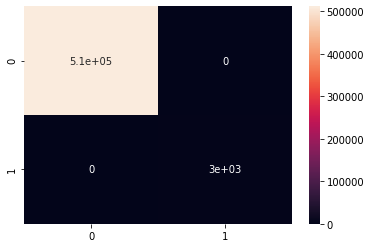

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

**그래디언트 부스팅 회귀 트리에 가지치기**

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.977


**그래디언트 부스팅 회귀 트리에 learning_rate 기법**

In [ ]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_test, y_test)))

훈련 세트 정확도: 0.987
훈련 세트 정확도: 0.986
